# Homework 3 Fitting ODEs!

**You must work alone as much as possible on this assignment.** You are welcome to ask colleagues for help with a bug in your code, but this should be for very minor issues. 





# Problem 1: Analysis of a simple chemostat


Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth{(say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

We use the following equations and info to describe the chemostat dynamics:

Let: 
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/l$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/l.
- V be the volume of the chemost stat and equal to 1$l$.
- Q be the fixed volumetric flow rate and equal to 1 $l/h$.
- q = Q/V be the dilution rate ($h^{-1}$)

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

However, we have several **unknown parameters that we need to estimate**:

- r is the growth rate of bacteria ($h^{-1}$) defined as $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$, but $K_m$ and $R_{max}$ are unknown. 
- y is the yield parameter and is also unknown. 

So we went to the lab and **collected training data (see csv file).**



# In the space below, plot the training data versus time. 
    - Label all axes and data sets. Unclear figures will lose points.
    

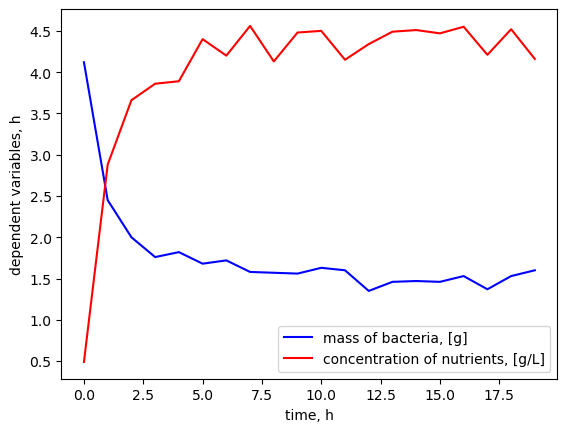

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('training_data.csv')

t_test = df.time
N_test = df.N
c_test = df.c
plt.plot(t_test, N_test, 'b', label='mass of bacteria, [g]')
plt.plot(t_test, c_test, 'r', label='concentration of nutrients, [g/L]')
plt.xlabel('time, h')
plt.ylabel('dependent variables, h')
plt.legend()
training_data = np.array([N_test, c_test])

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [2]:
from scipy.integrate import solve_ivp

def chemostat(t, variables, Rmax, Km, y):
    N, c = variables
    c0 = 8
    V = 1
    Q = 1
    
    q = Q/V
    r = Rmax*c/(Km + c)
    dNdt = r*N - q*N
    dcdt = q*c0 - q*c - (1/y)*r*N
    return [dNdt, dcdt]

#chemostat(0.0, [4.12, 0.49], 1, 1, 1)

In [5]:
def RMSE(params):
    Rmax, Km, y = params
    #y = 0.5
    ti = 0
    tf = 19
    Y0 = [4.12, 0.49]
    n = np.shape(training_data)[1]
    ODE_output = solve_ivp(chemostat, [ti, tf], Y0, method='RK45',
                           t_eval=np.linspace(0, tf, n), args=(Rmax, Km, y))
    err = training_data - ODE_output.y
    SSE = np.sqrt(np.sum(err**2))
    return SSE

# Check that function works correctly
#RMSE([1, 2, 3])

15.50369153075076

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

In [16]:
from scipy.optimize import minimize
%timeit min_sol = minimize(RMSE, x0=(1, 1, 1))

print("\n", min_sol.x)

589 ms ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 [ 5.22678382 18.56121686  0.42630615]


In [17]:
615/2.962













207.62997974341658

In [ ]:
Y0 = [4.12, 0.49]
solution = solve_ivp(chemostat, [0, 19], Y0, args=min_sol.x, t_eval=np.linspace(0, 19, 250))

plt.plot(solution.t, solution.y[0, :], 'b', label='mass of bacteria, [g]')
plt.plot(t_test, N_test, 'ro', label='training data for bacteria, [g]')
plt.xlabel("Time")
plt.ylabel('mass of bacteria, [g]')
plt.legend();

In [ ]:
plt.plot(solution.t, solution.y[1, :], 'g', label='Concentration of nutrients, [g/L]')
plt.plot(t_test, c_test, 'ro', label='Training data for nutrients, [g/L]')
plt.xlabel("Time")
plt.ylabel('Concentration of nutrients, [g/L]')
plt.legend();

In [ ]:
RMSE([5.22872291, 18.56967811, 0.42630431])

In [ ]:
RMSE([2.7383, 7.8372, 0.43])

In [ ]:
solution = solve_ivp(chemostat, [0, 19], Y0, args=(5.22872291, 18.56967811, 0.42630431), t_eval=np.linspace(0, 19, 250))

plt.plot(solution.t, solution.y[0, :], 'b', label='mass of bacteria, [g]')
plt.plot(t_test, N_test, 'ro', label='training data for bacteria, [g]')
plt.xlabel("Time")
plt.ylabel('mass of bacteria, [g]')
plt.legend();

In [ ]:
solution = solve_ivp(chemostat, [0, 19], Y0, args=(2.7383, 7.8372, 0.43), t_eval=np.linspace(0, 19, 250))

plt.plot(solution.t, solution.y[0, :], 'b', label='mass of bacteria, [g]')
plt.plot(t_test, N_test, 'ro', label='training data for bacteria, [g]')
plt.xlabel("Time")
plt.ylabel('mass of bacteria, [g]')
plt.legend();